# Noa Pereira Prada Schnor

# Machine Learning and Statistics Module

# GMIT

This assessment concerns the well-known Boston House Prices dataset and the Python packages scipy, keras, and jupyter. The project consists in five sections: 1. Introduction of the Boston House Price Dataset; 2. Description - descriptive statistics and plots to describe the Boston House Price dataset; 3. Inference/Analysis - using inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t; 4. Prediction - using keras to create a neural network that can predict the median house price based on the other variables in the dataset and 5. Conclusions.


1. Description of the Boston House Price Dataset

2. Description 

In [1]:
#import libraries
import pandas as pd
from sklearn.datasets import load_boston
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load dataset

In [3]:
df = load_boston()

In [4]:
#Descriptive analysis

#Shape - number of rows and columns
df.data.shape

(506, 13)

In [20]:
#Checking missing data
df_bsn.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [21]:
# Description of the dataset
df.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [9]:
#Conversion to numpy array - target is the variable MEDV

df_bsn = pd.DataFrame(df.data,columns=df.feature_names)
df_bsn['target'] = pd.Series(df.target)

df_bsn = pd.DataFrame(df['data'], columns=df['feature_names'])
df_bsn['target'] = df['target']

#Check the first rows
df_bsn.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#Return a Numpy representation of the DataFrame
df_bsn.values

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          3.96900000e+02,   4.98000000e+00,   2.40000000e+01],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          3.96900000e+02,   9.14000000e+00,   2.16000000e+01],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          3.92830000e+02,   4.03000000e+00,   3.47000000e+01],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          3.96900000e+02,   5.64000000e+00,   2.39000000e+01],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          3.93450000e+02,   6.48000000e+00,   2.20000000e+01],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          3.96900000e+02,   7.88000000e+00,   1.19000000e+01]])

In [11]:
df_bsn.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
#Split the input and the output variables

prices = df_bsn['target']
features = df_bsn.drop('target', axis = 1)

In [13]:
df_bsn.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


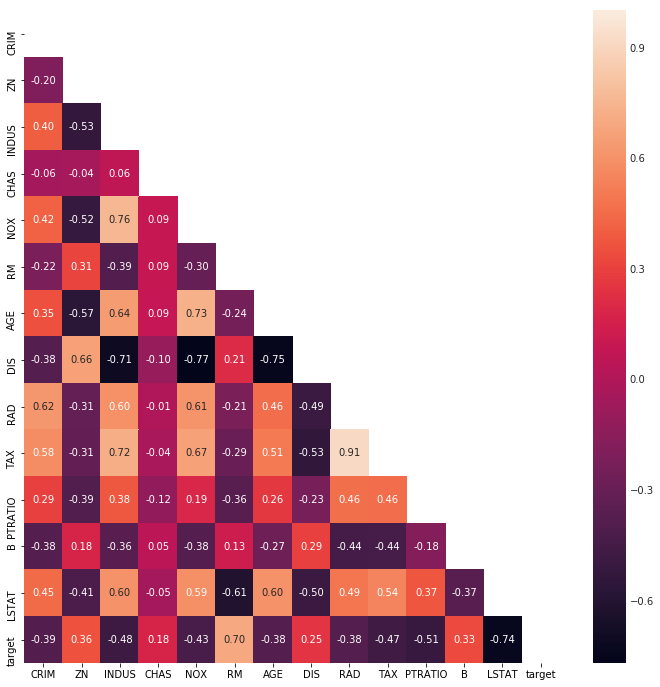

In [16]:
# Heatmap pf Pearson Correlation with no redundant mappings

corr = df_bsn.corr(method='pearson')
fig, ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
     ax = sns.heatmap(corr, annot=True, fmt=".2f", mask=mask)
plt.show()

#From Correlation data, We can confim that variable LSTAT, RM, AGE and PTRATIO have good corelation with our output variable price. These variables we need to consider when we optimze our predictive value #######

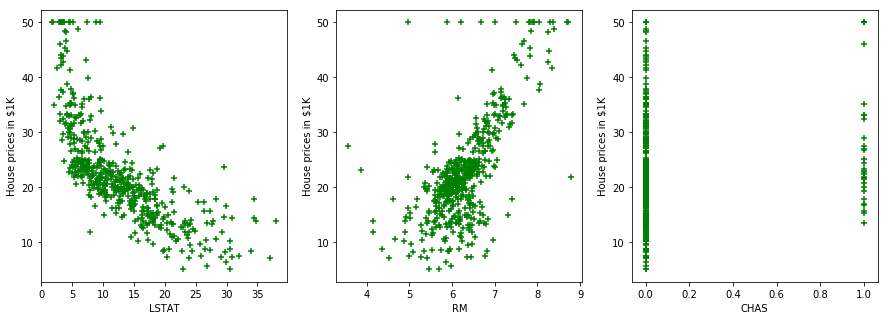

In [31]:
plt.figure(figsize=(15, 5))

features = ['LSTAT', 'RM', 'CHAS']
price = df_bsn['target']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_bsn[col]
    y = price
    plt.scatter(x, y, c='g', marker='+')
    plt.xlabel(col)
    plt.ylabel('House prices in $1K')